In [ ]:
!pip install face_recognition

## Face Clustering

In [59]:
import face_recognition
import matplotlib.pyplot as plt
from skimage import feature as ft
from skimage.color import rgb2gray
from PIL import Image
from sklearn.cluster import DBSCAN
import numpy as np

import os

In [39]:
img = Image.open('./yolov5/runs/detect/exp/corps/face/7T5A9436.jpg')

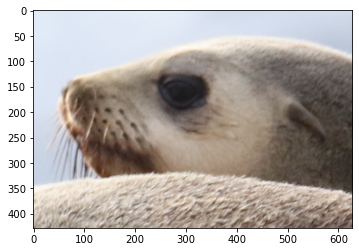

In [40]:
plt.imshow(img)

In [43]:
img_resize = img.resize((416, 416), Image.Resampling.BILINEAR) 

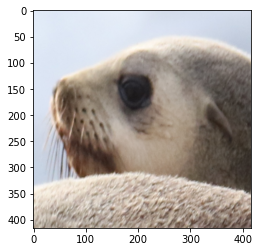

In [44]:
plt.imshow(img_resize)

In [45]:
gray = rgb2gray(img_resize) / 255.0

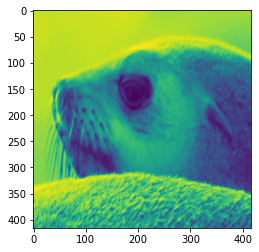

In [46]:
plt.imshow(gray)

In [47]:
features, hog_image = ft.hog(gray,  # input image
                  orientations=12,  # number of bins
                  pixels_per_cell=[10, 10], # pixel per cell
                  cells_per_block=[4, 4], # cells per blcok
                  block_norm = 'L1', #  block norm : str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional
                  transform_sqrt = True, # power law compression (also known as gamma correction)
                  feature_vector=True, # flatten the final vectors
                  visualize=True) # return HOG map

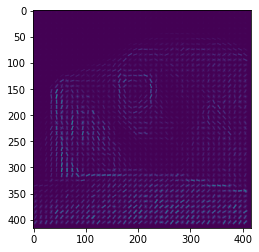

In [48]:
plt.imshow(hog_image)

In [49]:
features.shape

(277248,)

In [66]:
files = os.listdir('./face/')
result = []

for file in files:
    img = img=Image.open('./face/'+file)
    img_resize = img.resize((416, 416), Image.Resampling.BILINEAR)
    gray = rgb2gray(img_resize) / 255.0
    features = ft.hog(gray,  # input image
                  orientations=12,  # number of bins
                  pixels_per_cell=[10, 10], # pixel per cell
                  cells_per_block=[4, 4], # cells per blcok
                  block_norm = 'L1', #  block norm : str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional
                  transform_sqrt = True, # power law compression (also known as gamma correction)
                  feature_vector=True, # flatten the final vectors
                  visualize=False) # return HOG map
    result.append(features)

In [86]:
clf = DBSCAN(eps=4, min_samples=3, metric="euclidean", n_jobs=-1)
clf.fit(result)

DBSCAN(eps=4, min_samples=3, n_jobs=-1)

In [92]:
np.unique(clf.labels_)

array([-1,  0,  1], dtype=int64)

In [101]:
labels = list(clf.labels_)

In [108]:
[i for i, x in enumerate(labels) if x==1]

[34, 36, 41, 42]

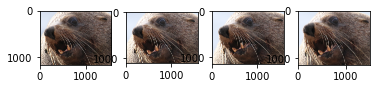

In [120]:
plt.figure(figsize=(9, 9))
for m in range(len([i for i, x in enumerate(labels) if x==1])): 
    plt.subplot(len([i for i, x in enumerate(labels) if x==1])//6+1, 6 , m + 1)
    img = Image.open('./face/'+files[[i for i, x in enumerate(labels) if x==1][m]])
    plt.imshow(img)
plt.show()

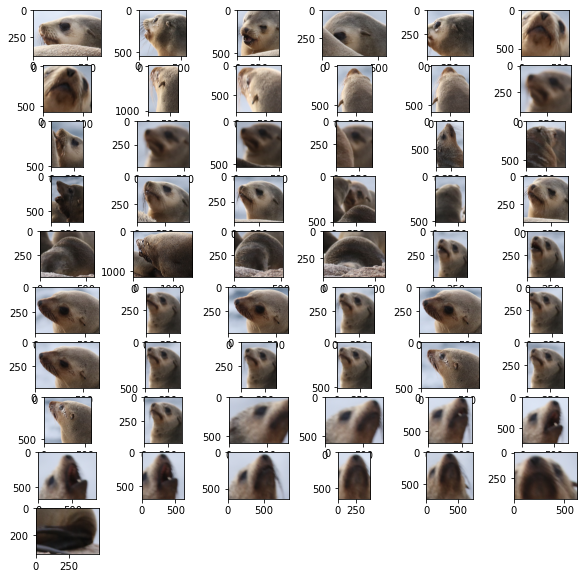

In [124]:
plt.figure(figsize=(10, 10))
for m in range(len([i for i, x in enumerate(labels) if x==0])): 
    plt.subplot(len([i for i, x in enumerate(labels) if x==0])//6+1, 6 , m + 1)
    img = Image.open('./face/'+files[[i for i, x in enumerate(labels) if x==0][m]])
    plt.imshow(img)
plt.show()

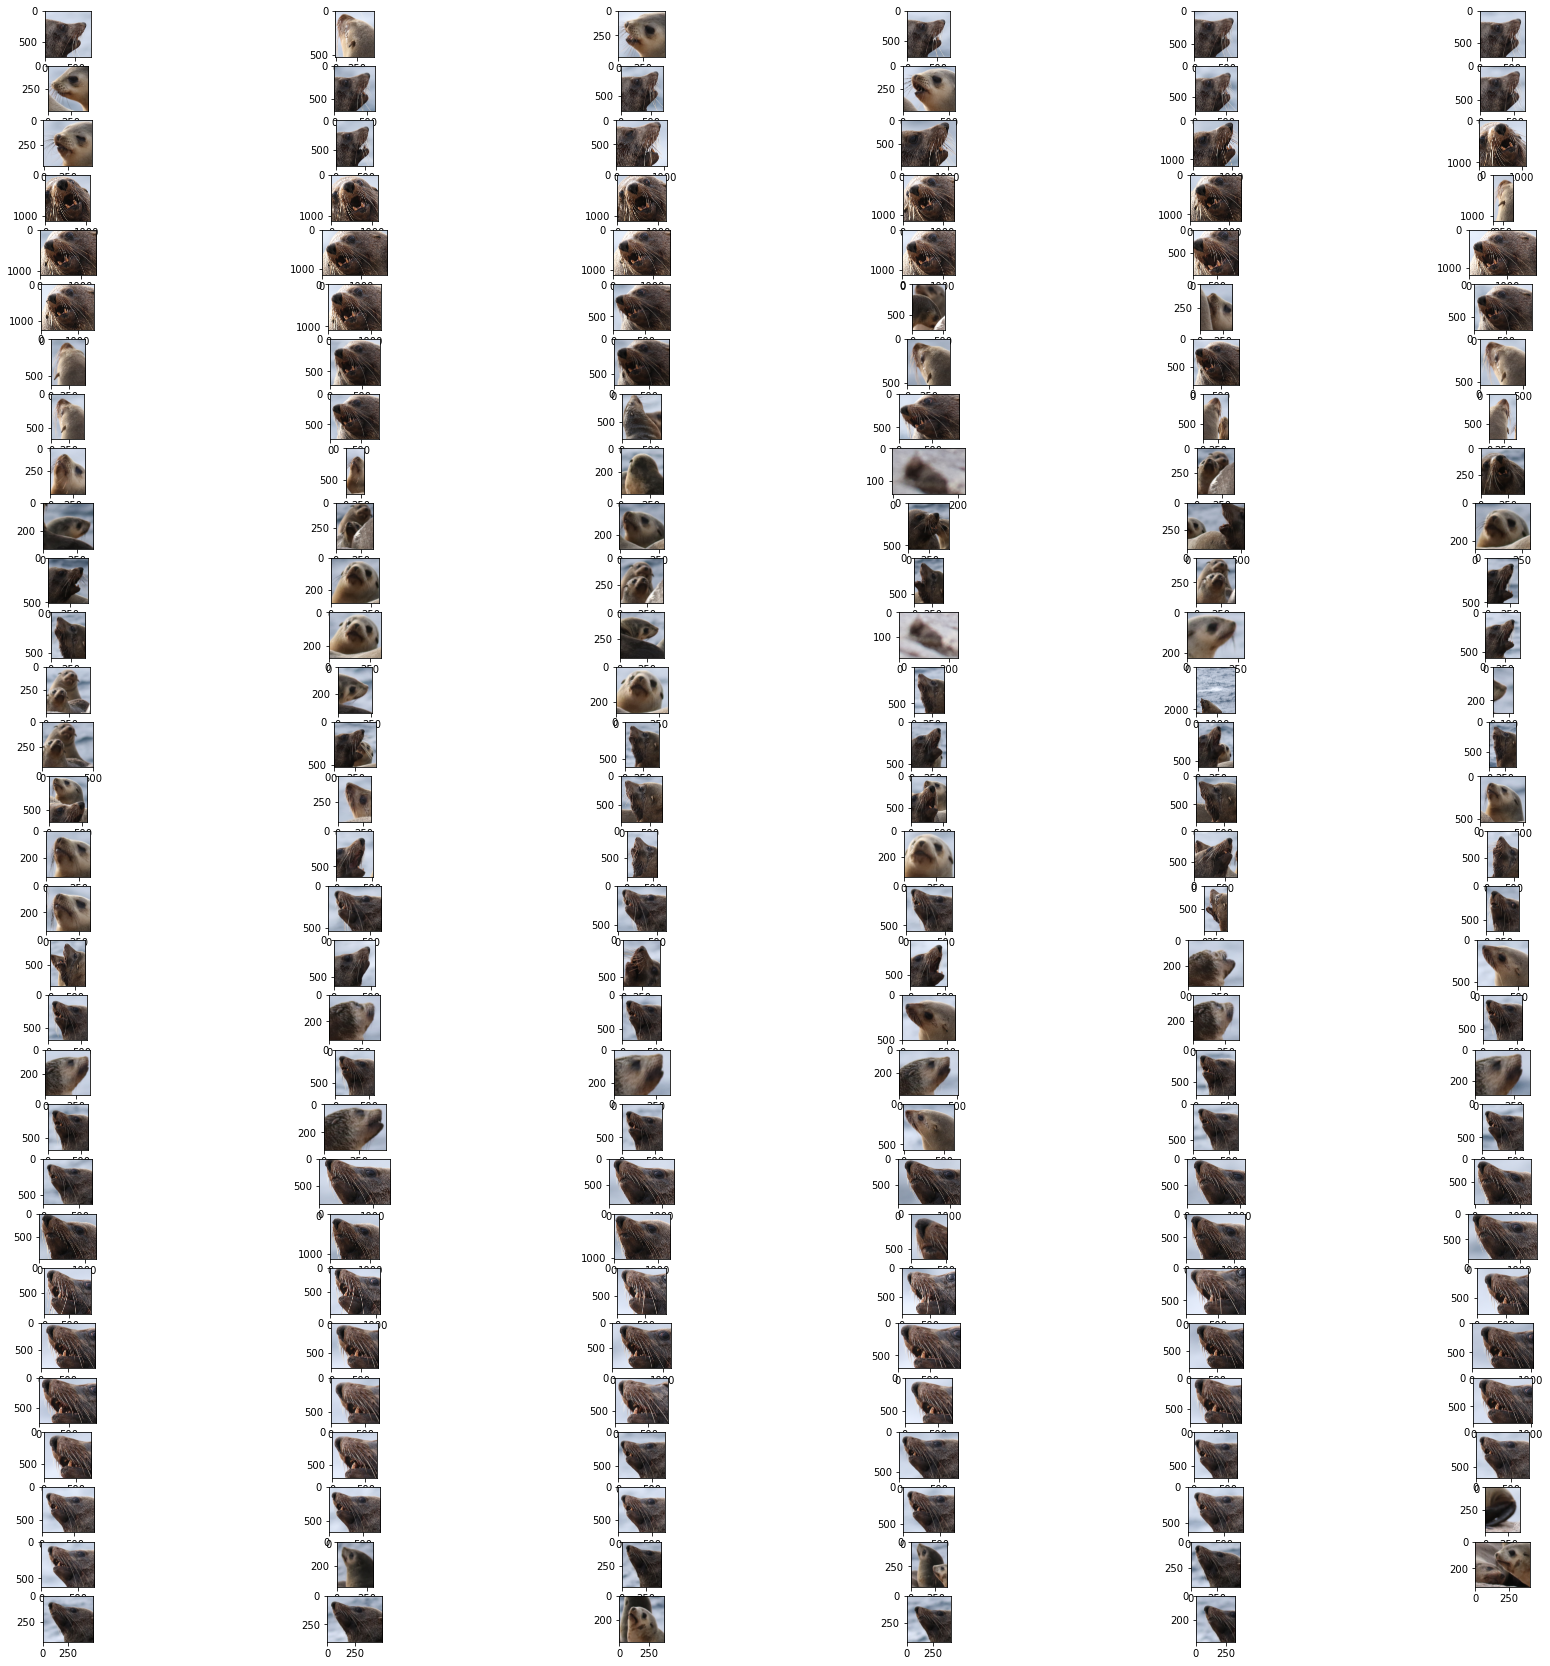

In [125]:
plt.figure(figsize=(30, 30))
for m in range(len([i for i, x in enumerate(labels) if x==-1])): 
    plt.subplot(len([i for i, x in enumerate(labels) if x==-1])//6+1, 6 , m + 1)
    img = Image.open('./face/'+files[[i for i, x in enumerate(labels) if x==-1][m]])
    plt.imshow(img)
plt.show()